In [316]:
import math
from sympy import *
init_printing(use_unicode=True)
x =symbols('x')

In [317]:
from icecream import ic
import random

# Uniwersalne funkcje do wyliczania Taylora oraz rysowania wykresow

In [318]:
def getTaylorSeriesWithComponents(func, Nn, x0, returnComponents=True):
    skladowe = []
    szeregTaylora = 0
    for n in range(0, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX0 = pochodna.subs(x, x0)
        skladowa = pochodnaX0 / math.factorial(n) * ((x - x0)**n)
        # ic(pochodna, pochodnaX0, skladowa)
        skladowe.append(skladowa)
        szeregTaylora += skladowa
    if returnComponents:
        return szeregTaylora, skladowe
    else:
        return szeregTaylora

def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5)):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title, ylim=(-10, 10))
    for fp in funcsWithPlotParameters:
        func = fp.get('func', None)
        if func:
            color = fp.get('color', 'blue')
            label = fp.get('label', '')
            p = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color=color, label=label, ylim=(-10, 10))
            plots.append(p[0])
    plots.show()
    return plots

# Zadanie T1

In [319]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    szeregTaylora, skladowe = getTaylorSeriesWithComponents(func, Nn, x0, True)
    # Pierwszy układ wykresów - wykres funkcji i jej N-tego przybliżenia
    wykresFunkcjiOrazTaylora = getPlots([{'func':func, 'color':"red", 'label':"f(x)"},
                                     {'func':szeregTaylora, 'color':"blue", 'label':"taylor"}],
                                    "Wykres funkcji i jej N-tego przyblizenia", (x0-5, x0+5))
    # Drugi układ wykresów - wykres tailora i wszystkich składowych
    taylorPlotData = [{'func': szeregTaylora, 'color': "red", 'label': "taylor"}]  # Dodanie danych wykresu Taylora
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            taylorPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"a{i}"}]) # Dodanie danych wykresow skladowych
    wykresTayloraOrazSkladowych = getPlots(taylorPlotData, "Wykres taylora oraz wykresy jego skladowych", (x0-5, x0+5))
    return [s for s in skladowe if s != 0], szeregTaylora, wykresFunkcjiOrazTaylora, None#wykresTayloraOrazSkladowych

ic| func: 1/x, Nn: 7, x0: 1


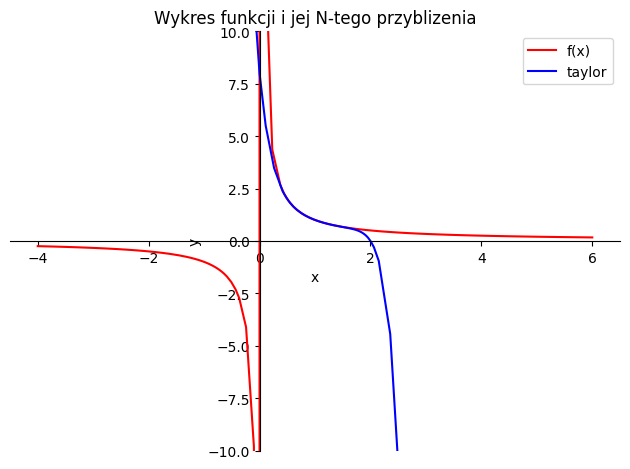

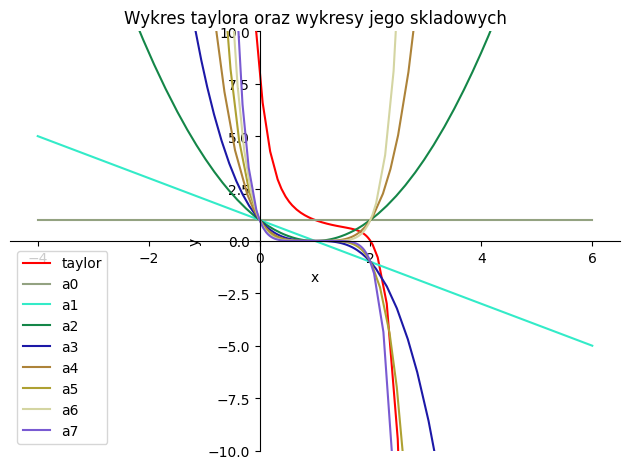

[1, 1 - x, (x - 1)**2, -(x - 1)**3, (x - 1)**4, -(x - 1)**5, (x - 1)**6, -(x - 1)**7]
-x - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2


In [320]:
# t1Func = sin(x)
# t1Func = E**x
t1Func = 1/x
t1N = 7
# t1X0 = 0
t1X0 = 1
w1, w2, w3, w4 = t1(t1Func, t1N, t1X0)
print(w1)
print(w2)

# Zadanie T2

In [321]:
def t2(func, N1, N2, x0):
    ic(func, N1, N2, x0)
    przyblizenia = []
    for n in range(N1, N2+1):
        taylor = getTaylorSeriesWithComponents(func, n, x0, False)
        przyblizenia.append(taylor)
    ic(przyblizenia)
    # Wykres funkcji i wszystkich przyblizen od N1 do N2
    functionPlotData = [{'func': func, 'color': "red", 'label': "f(x)"}]  # Dodanie danych wykresu Funkcji
    for i, przyblizenie in enumerate(przyblizenia):
        if przyblizenie:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            functionPlotData.extend([{'func': przyblizenie, 'color': randomColor, 'label': f"taylor{N1+i}"}]) # Dodanie danych wykresow przyblizen
    wykresFunkcjiOrazJejPrzyblizen = getPlots(functionPlotData, "Wykres funkcji f(x) oraz jej przyblizen", (x0-5, x0+5))
    return przyblizenia, wykresFunkcjiOrazJejPrzyblizen

ic| func: 1/x, N1: 3, N2: 7, x0: 1
ic| przyblizenia: [-x - (x - 1)**3 + (x - 1)**2 + 2,
                   -x + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2,
                   -x - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2,
                   -x + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2,
                   -x - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2]


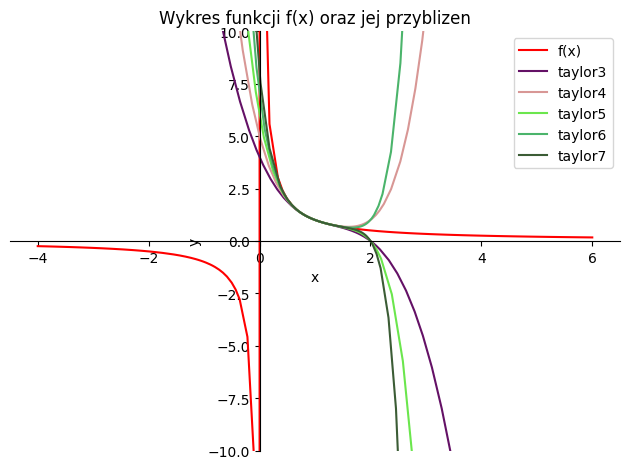

In [322]:
# t2Func = sin(x)
t2Func = t1Func
t2N1 = 3
t2N2 = 7
# t2X0 = 0
t2X0 = t1X0
w1, w2 = t2(t2Func, t2N1, t2N2, t2X0)

# Zadanie T3

In [327]:
t3Func1 = cos(x)
t3Func2 = 1 / (1-x)
t3Func3 = log(1 / (1-x))

t3Maclaurin1 = getTaylorSeriesWithComponents(t3Func1, 5 ,0, False)
t3Maclaurin2 = getTaylorSeriesWithComponents(t3Func2, 5 ,0, False)
t3Maclaurin3 = getTaylorSeriesWithComponents(t3Func3, 5 ,0, False)

ic(t3Maclaurin1)
ic(t3Maclaurin2)
ic(t3Maclaurin3)

ic| t3Maclaurin1: x**4/24 - x**2/2 + 1
ic| t3Maclaurin2: x**5 + x**4 + x**3 + x**2 + x + 1
ic| t3Maclaurin3: x**5/5 + x**4/4 + x**3/3 + x**2/2 + x
